In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as profiling
# stop warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# display column limit
pd.set_option('display.max_columns',500)

In [3]:
# load data
train = pd.read_csv('../input/train_data.csv')
validation = pd.read_csv('../input/test_data.csv')
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,0,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,0,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,0,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [4]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,0,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,0,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,0,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [5]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,2.183799,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,2.518936,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,1.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,4.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,10.000000,1.000000


In [6]:
# shuffle
train = train.sample(frac=1)

In [7]:
# Missing values
# garden
train['Garden'] = train['Garden'].fillna(train['Garden'].mode()[0])
#Building dimensions
train['Building Dimension']=train['Building Dimension'].fillna(train['Building Dimension'].mean())
# Date_of_Occupancy
train['Date_of_Occupancy']=train['Date_of_Occupancy'].fillna(train['Date_of_Occupancy'].mean())
# Geo_Code
train['Geo_Code']=train['Geo_Code'].fillna(train['Geo_Code'].mode()[0])

### test
validation['Garden'] = validation['Garden'].fillna(validation['Garden'].mode()[0])
#Building dimensions
validation['Building Dimension']=validation['Building Dimension'].fillna(validation['Building Dimension'].mean())
# Date_of_Occupancy
validation['Date_of_Occupancy']=validation['Date_of_Occupancy'].fillna(validation['Date_of_Occupancy'].mean())
# Geo_Code
validation['Geo_Code']=validation['Geo_Code'].fillna(validation['Geo_Code'].mode()[0])

In [8]:
train['years_of_occupation'] = 2016 - train['Date_of_Occupancy']
# test
validation['years_of_occupation'] = 2016 - validation['Date_of_Occupancy']
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,years_of_occupation
4638,H1933,2012,0.748634,1,V,V,V,U,1914.0,1,1964.456404,0,73304,0,51.543596
738,H18310,2013,1.000000,0,V,N,O,R,4650.0,1,1960.000000,5,13001,0,56.000000
4374,H2014,2014,1.000000,0,V,N,O,R,500.0,2,1972.000000,4,68142,1,44.000000
2913,H5989,2012,1.000000,0,V,N,O,R,2106.0,2,1960.000000,6,38421,1,56.000000
1879,H4230,2012,1.000000,0,N,V,V,U,2321.0,2,1980.000000,0,26058,0,36.000000


In [9]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,years_of_occupation
4638,H1933,2012,0.748634,1,V,V,V,U,1914.0,1,1964.456404,0,73304,0,51.543596
738,H18310,2013,1.000000,0,V,N,O,R,4650.0,1,1960.000000,5,13001,0,56.000000
4374,H2014,2014,1.000000,0,V,N,O,R,500.0,2,1972.000000,4,68142,1,44.000000
2913,H5989,2012,1.000000,0,V,N,O,R,2106.0,2,1960.000000,6,38421,1,56.000000
1879,H4230,2012,1.000000,0,N,V,V,U,2321.0,2,1980.000000,0,26058,0,36.000000


In [10]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim,years_of_occupation
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,2.183799,0.228212,51.543596
std,1.383769,0.239756,0.460629,2261.229034,0.940632,34.701167,2.518936,0.419709,34.701167
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.997268,0.000000,531.500000,2.000000,1960.000000,0.000000,0.000000,36.000000
50%,2013.000000,1.000000,0.000000,1100.000000,2.000000,1964.456404,1.000000,0.000000,51.543596
75%,2015.000000,1.000000,1.000000,2250.000000,3.000000,1980.000000,4.000000,0.000000,56.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,10.000000,1.000000,471.000000


In [11]:
validation.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,years_of_occupation
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310,56.0
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310,56.0
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,0,3310,56.0
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321,12.0
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321,12.0


# EXPLORATORY DATA ANALYSIS

In [12]:
# find missing values
train.isnull().sum().sum()

0

In [13]:
validation.isnull().sum().sum()

0

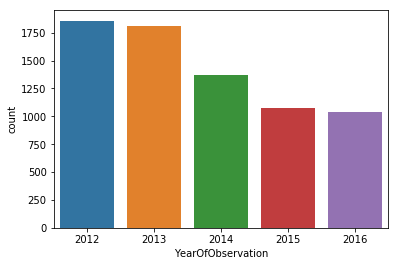

In [14]:
sns.countplot(x='YearOfObservation', data=train) 

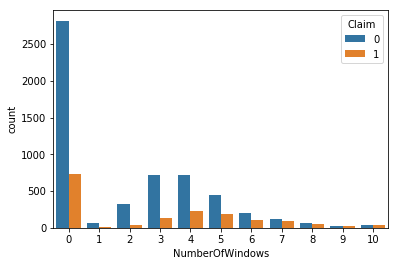

In [15]:
sns.countplot(x='NumberOfWindows', data=train, hue='Claim')

In [16]:
train['NumberOfWindows'].corr(train['Claim'])*100

13.67051070909582

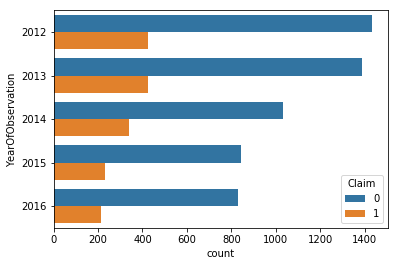

In [17]:
sns.countplot(y='YearOfObservation', data=train, hue='Claim') 

In [18]:
train['YearOfObservation'].corr(train['Claim'])*100

-1.6366724367277214

the number of year of observation as been on the decline since 2012, the lowest is in 2016.
in 2012, high observation had highest number of claims and low observation have low claims, their is a weak negative relationship between the two.

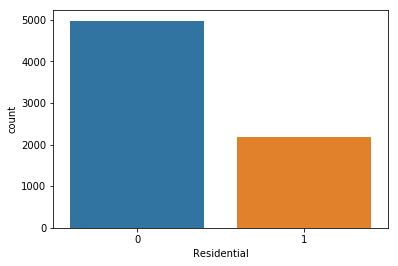

In [19]:
sns.countplot(x='Residential', data=train)

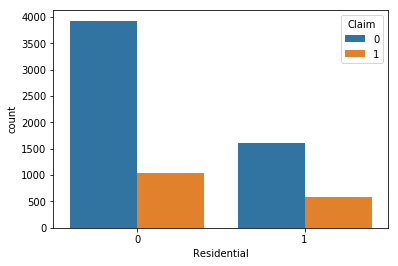

In [20]:
sns.countplot(x='Residential', data=train, hue='Claim')

In [21]:
train['Residential'].corr(train['Claim'])*100

6.35090227060731

non-residential are more than non-residential. claims made in non-residential are high compared to claims made in residential areas.
there is a weak positive relationship between the featurers.

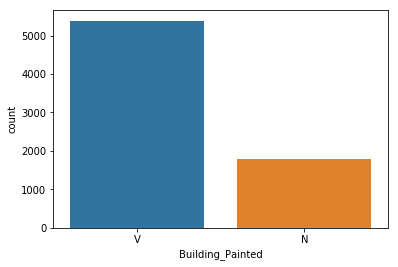

In [22]:
sns.countplot(x='Building_Painted',data=train)

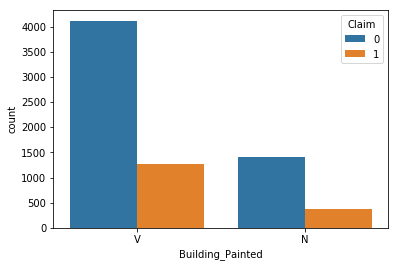

In [23]:
sns.countplot(x='Building_Painted', data=train, hue='Claim')

non-painted builds are the majority and more claims made were from non-painted buildings.

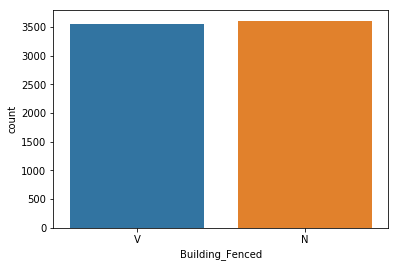

In [24]:
sns.countplot(x='Building_Fenced', data=train)

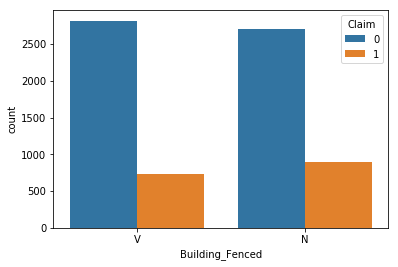

In [25]:
sns.countplot(x='Building_Fenced', data=train, hue='Claim')

the number of fenced buildings and non-fenced buildings is relatively same. the number of claims for each is also relatively similar.

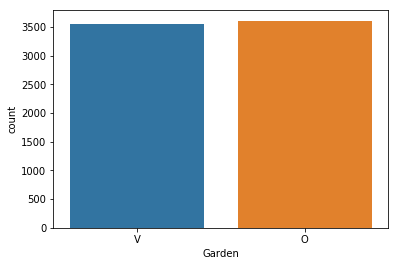

In [26]:
sns.countplot(x='Garden', data=train)

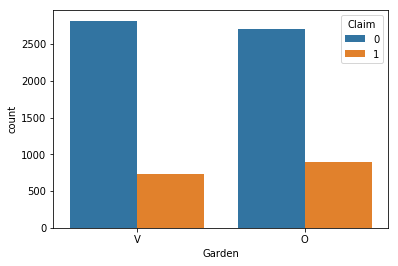

In [27]:
sns.countplot(x='Garden',data=train, hue='Claim')

the number of houses with garden and missing is relatively same. similar number of claims are made for houses with and without fences

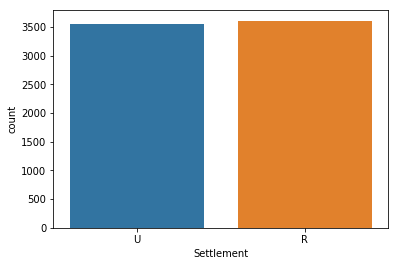

In [28]:
sns.countplot(x='Settlement',data=train)

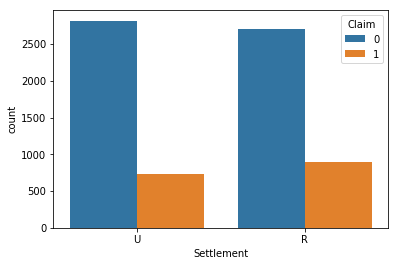

In [29]:
sns.countplot(x='Settlement', data=train, hue='Claim')

urban and rural settlement are almost similar. claims made in rural are slightly higher than in urban.

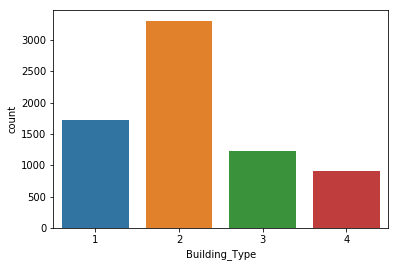

In [30]:
sns.countplot(x='Building_Type', data=train)

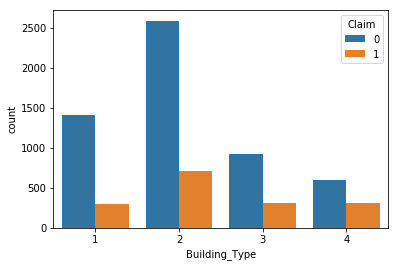

In [31]:
sns.countplot(x='Building_Type', data=train, hue='Claim')

In [32]:
train['Building_Type'].corr(train['Claim'])*100

11.216759009773645

Building type 2, is the largest followed by 1,3,4. in terms of claims made type 2 was te largest followed by 3&4 and lastly type 1. there is relatively a positive relationship between Building_type and the claim made.

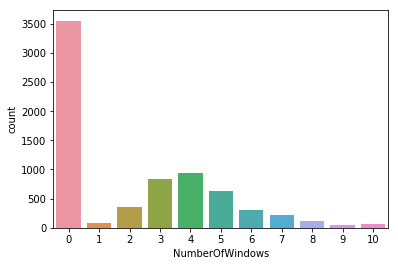

In [33]:
sns.countplot(x='NumberOfWindows',data=train)

houses with no windows had the higest number of claims followed by, 4,3,2,5,>10,6,7,9,8. houses with 1 window had no claim

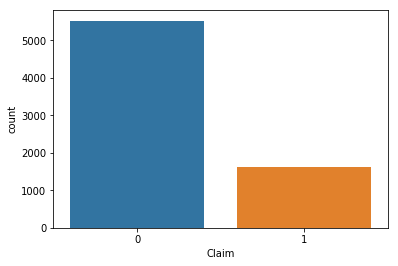

In [34]:
sns.countplot(x='Claim', data=train)

# DISTRIBUTION

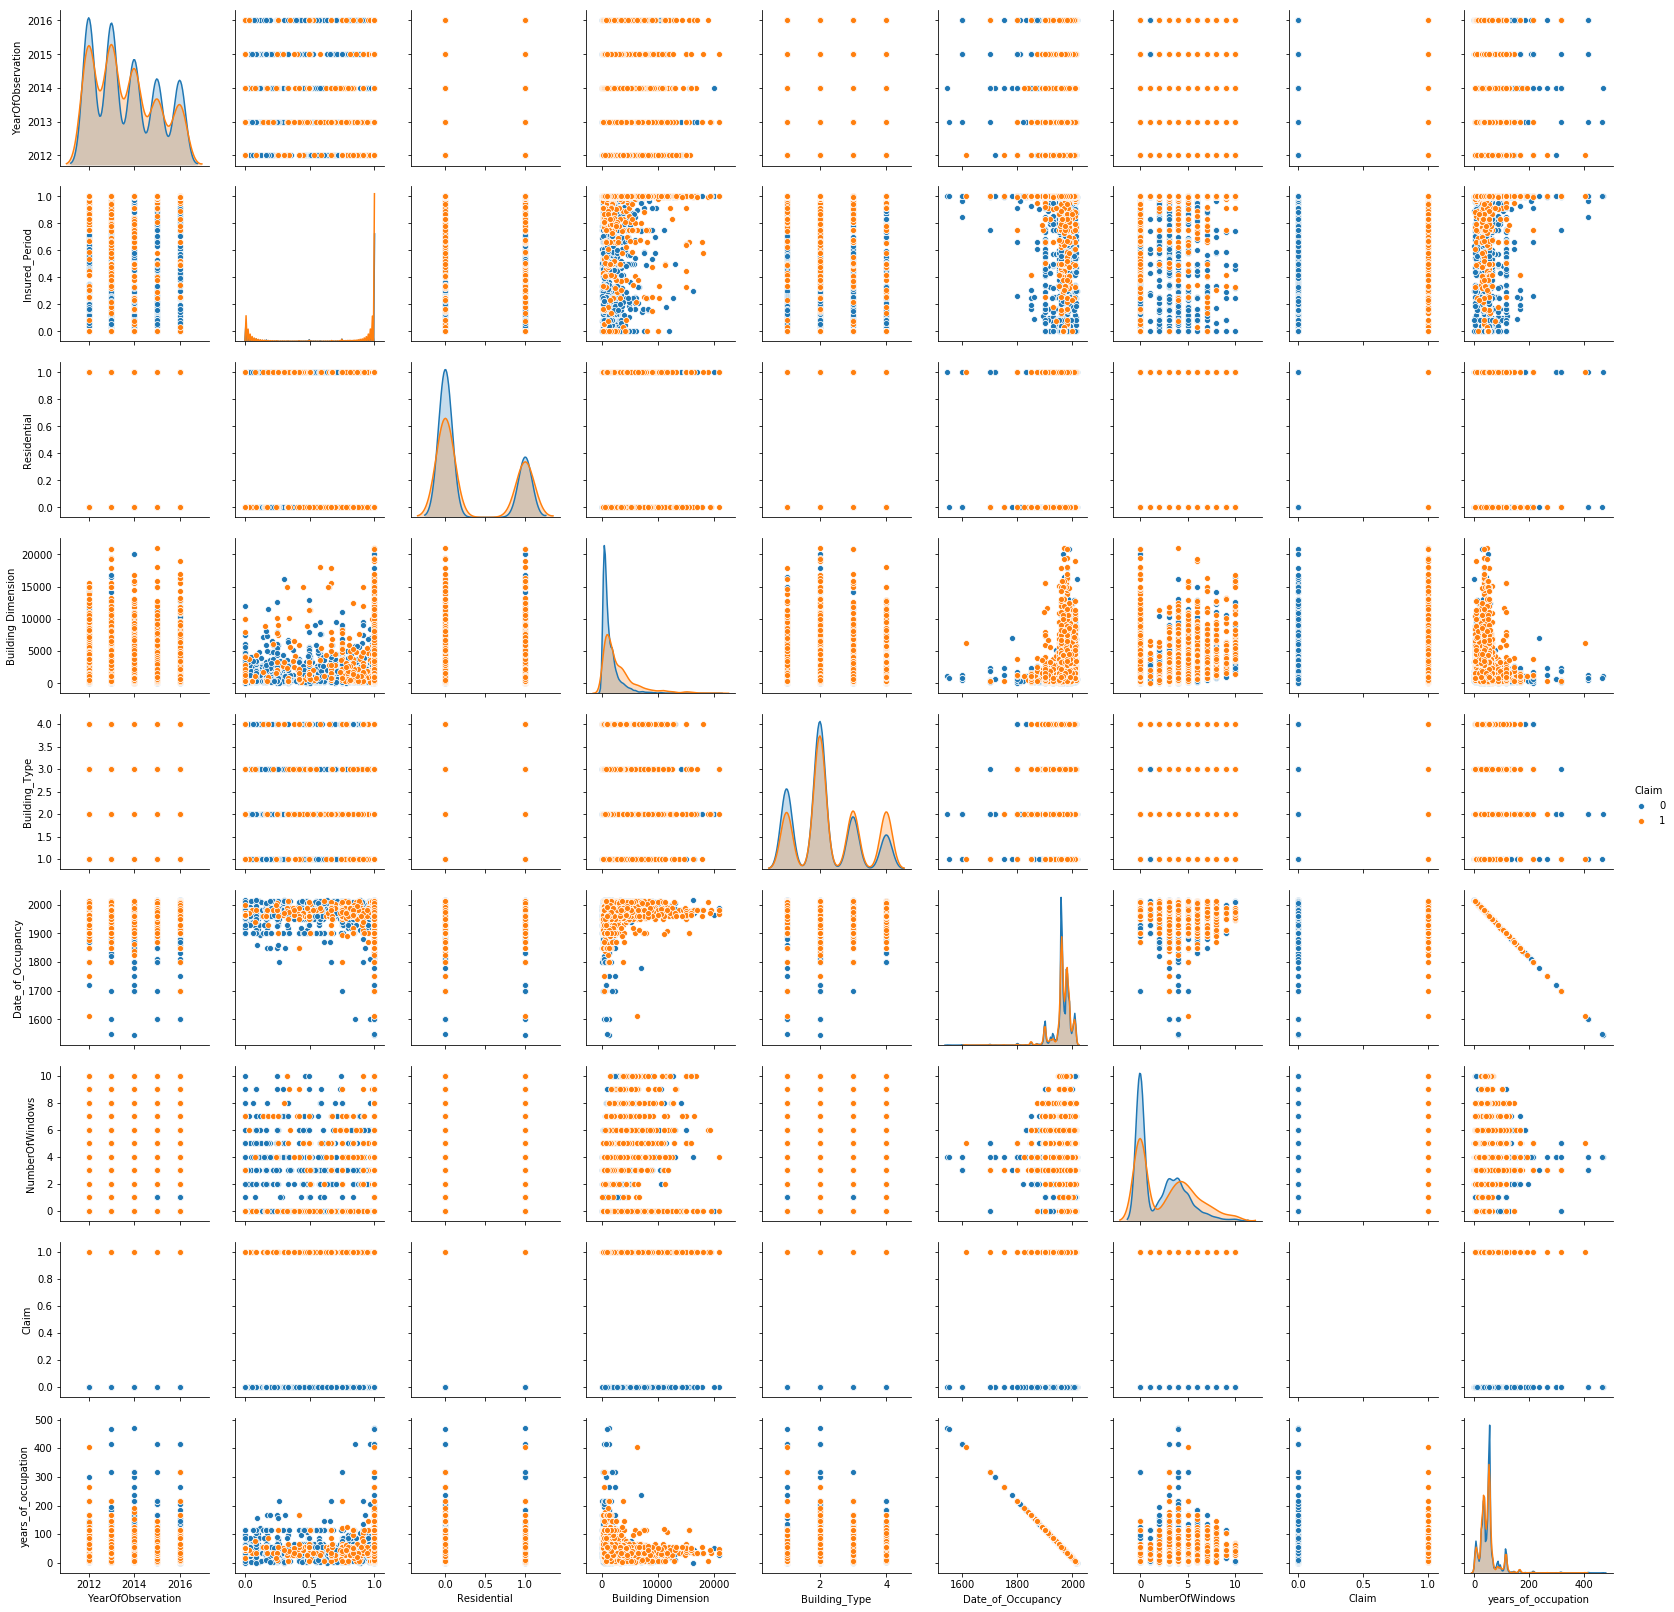

In [35]:
sns.pairplot(data=train, hue='Claim') #, hue='Claim'

In [36]:
train.corr()*100

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim,years_of_occupation
YearOfObservation,100.000000,2.543409,-4.039134,0.907498,0.548978,-2.846283,10.234475,-1.636672,2.846283
Insured_Period,2.543409,100.000000,-3.762008,0.737807,-1.781053,-0.301309,4.258513,8.871453,0.301309
Residential,-4.039134,-3.762008,100.000000,5.701187,33.403909,-4.015341,12.881793,6.350902,4.015341
Building Dimension,0.907498,0.737807,5.701187,100.000000,0.789286,19.964351,28.366452,29.521607,-19.964351
Building_Type,0.548978,-1.781053,33.403909,0.789286,100.000000,-14.025901,11.308372,11.216759,14.025901
Date_of_Occupancy,-2.846283,-0.301309,-4.015341,19.964351,-14.025901,100.000000,-15.028620,1.853699,-100.000000
NumberOfWindows,10.234475,4.258513,12.881793,28.366452,11.308372,-15.028620,100.000000,13.670511,15.028620
Claim,-1.636672,8.871453,6.350902,29.521607,11.216759,1.853699,13.670511,100.000000,-1.853699
years_of_occupation,2.846283,0.301309,4.015341,-19.964351,14.025901,-100.000000,15.028620,-1.853699,100.000000


# Feature Engineering

In [37]:
# checking the balance of the data
print(' Building has Claims during insured period: ' + str(train['Claim'].value_counts()[0]) + ' is', round(train['Claim'].value_counts()[0]/len(train) * 100,2), '% of dataset')
print(' Building does not have Claims: ' + str(train['Claim'].value_counts()[1]) + ' is', round(train['Claim'].value_counts()[1]/len(train) * 100,2), '% of dataset')

 Building has Claims during insured period: 5526 is 77.18 % of dataset
 Building does not have Claims: 1634 is 22.82 % of dataset


the dataset is fairly unbalanced. we will used smote to balance the datasets

In [38]:
# smote
# oversampling
from imblearn.over_sampling import SMOTE

count_class_0, count_class_1 = train.Claim.value_counts()

# divide by class
train_class_0 = train[train['Claim'] == 0]
train_class_1 = train[train['Claim'] == 1]

Using TensorFlow backend.


Random over-sampling:
1    5526
0    5526
Name: Claim, dtype: int64


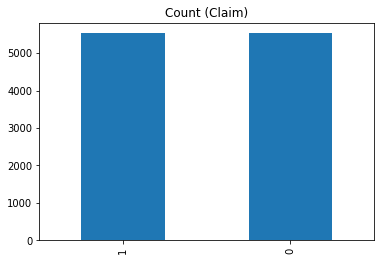

In [39]:
train_class_1_over = train_class_1.sample(count_class_0, replace=True)
train_test_over = pd.concat([train_class_0, train_class_1_over], axis=0)

print('Random over-sampling:')
print(train_test_over.Claim.value_counts())

train_test_over.Claim.value_counts().plot(kind='bar', title='Count (Claim)');

In [40]:
train = train_test_over

In [41]:
# rename columns
train.rename(columns={'Building Dimension':'Building_Dimension'},inplace=True)
# test
validation.rename(columns={'Building Dimension':'Building_Dimension'},inplace=True)

In [42]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,years_of_occupation
4638,H1933,2012,0.748634,1,V,V,V,U,1914.0,1,1964.456404,0,73304,0,51.543596
738,H18310,2013,1.000000,0,V,N,O,R,4650.0,1,1960.000000,5,13001,0,56.000000
1879,H4230,2012,1.000000,0,N,V,V,U,2321.0,2,1980.000000,0,26058,0,36.000000
3255,H15305,2012,0.084699,0,V,N,O,R,383.0,1,1959.000000,2,46102,0,57.000000
5938,H6764,2012,1.000000,0,V,N,O,R,408.0,1,2001.000000,3,84031,0,15.000000


In [43]:
# feature generation
# years of occupation
train['years_of_occupation'] = 2016 - train['Date_of_Occupancy']
# residence before observation
train['residence_before_observation'] = train['YearOfObservation'] - train['Date_of_Occupancy']
# residence after observation
train['residence_after_observation'] = 2016 - train['YearOfObservation']
# K (residence/size)
train['years_of_occupation/size'] = train['years_of_occupation'] / train['Building_Dimension'] 
# insured/years_of_occupation
train['insured/years_of_occupation'] = train['Insured_Period'] / train['years_of_occupation']
# building_type/numberofWindows
train['Building_Type/Building_Dimension'] = train['Building_Type'] / train['Building_Dimension']
# value
train.round(4)
# validation
# years of occupation
validation['years_of_occupation'] = 2016 - validation['Date_of_Occupancy']
# residence before observation
validation['residence_before_observation'] = validation['YearOfObservation'] - validation['Date_of_Occupancy']
# residence after observation
validation['residence_after_observation'] = 2016 - validation['YearOfObservation']
# K (residence/size)
validation['years_of_occupation/size'] = validation['years_of_occupation'] / validation['Building_Dimension'] 
# insured/years_of_occupation
validation['insured/years_of_occupation'] = validation['Insured_Period'] / validation['years_of_occupation']
# building_type/numberofWindows
validation['Building_Type/Building_Dimension'] = validation['Building_Type'] / validation['Building_Dimension']

In [44]:
# normalizing
from sklearn.preprocessing import MinMaxScaler
# Building Dimension
scaler_Building_Dimension = MinMaxScaler()
train['Building_Dimension'] = train['Building_Dimension'].astype('float64')
train['Building_Dimension'] = scaler_Building_Dimension.fit_transform(train.Building_Dimension.values.reshape(-1,1))

# YearOfObservatio
scaler_YearOfObservation = MinMaxScaler()
train['YearOfObservation'] = scaler_YearOfObservation.fit_transform(train.YearOfObservation.values.reshape(-1,1))
# Date_of_Occupancy
scaler_Date_of_Occupancy = MinMaxScaler()
train['Date_of_Occupancy'] = scaler_Date_of_Occupancy.fit_transform(train.Date_of_Occupancy.values.reshape(-1,1))

# years_of_occupation
scaler_years_of_occupation = MinMaxScaler()
train['years_of_occupation'] = scaler_years_of_occupation.fit_transform(train.years_of_occupation.values.reshape(-1,1))
# residence_before_observation
scaler_residence_before_observation = MinMaxScaler()
train['residence_before_observation'] = scaler_residence_before_observation.fit_transform(train.residence_before_observation.values.reshape(-1,1))
# residence_after_observation
scaler_residence_after_observation = MinMaxScaler()
train['residence_after_observation'] = scaler_residence_after_observation.fit_transform(train.residence_after_observation.values.reshape(-1,1))
# number of windows
scaler_NumberOfWindows = MinMaxScaler()
train['NumberOfWindows'] = scaler_NumberOfWindows.fit_transform(train.NumberOfWindows.values.reshape(-1,1))

# validation
# Building Dimension
scaler_Building_Dimension = MinMaxScaler()
validation['Building_Dimension'] = validation['Building_Dimension'].astype('float64')
validation['Building_Dimension'] = scaler_Building_Dimension.fit_transform(validation.Building_Dimension.values.reshape(-1,1))

# YearOfObservatio
scaler_YearOfObservation = MinMaxScaler()
validation['YearOfObservation'] = scaler_YearOfObservation.fit_transform(validation.YearOfObservation.values.reshape(-1,1))
# Date_of_Occupancy
scaler_Date_of_Occupancy = MinMaxScaler()
validation['Date_of_Occupancy'] = scaler_Date_of_Occupancy.fit_transform(validation.Date_of_Occupancy.values.reshape(-1,1))

# years_of_occupation
scaler_years_of_occupation = MinMaxScaler()
validation['years_of_occupation'] = scaler_years_of_occupation.fit_transform(validation.years_of_occupation.values.reshape(-1,1))
# residence_before_observation
scaler_residence_before_observation = MinMaxScaler()
validation['residence_before_observation'] = scaler_residence_before_observation.fit_transform(validation.residence_before_observation.values.reshape(-1,1))
# residence_after_observation
scaler_residence_after_observation = MinMaxScaler()
validation['residence_after_observation'] = scaler_residence_after_observation.fit_transform(validation.residence_after_observation.values.reshape(-1,1))
# numberofwindows
scaler_NumberOfWindows = MinMaxScaler()
validation['NumberOfWindows'] = scaler_NumberOfWindows.fit_transform(validation.NumberOfWindows.values.reshape(-1,1))

In [45]:
train = train.round(4)

In [46]:
validation = validation.round(4)

In [47]:
# binary conversion
train['Building_Painted_Binary'] = train['Building_Painted'].map({'N':1,'V':0})
train['Building_Fenced_Binary'] = train['Building_Fenced'].map({'N':1,'V':0})
train['Garden_Binary'] = train['Garden'].map({'O':1,'V':0})
train['Settlement_Binary'] = train['Settlement'].map({'U':1,'R':0})
# test
validation['Building_Painted_Binary'] = validation['Building_Painted'].map({'N':1,'V':0})
validation['Building_Fenced_Binary'] = validation['Building_Fenced'].map({'N':1,'V':0})
validation['Garden_Binary'] = validation['Garden'].map({'O':1,'V':0})
validation['Settlement_Binary'] = validation['Settlement'].map({'U':1,'R':0})

In [48]:
# value
train['value'] = train['Building_Type']+ train['Building_Painted_Binary']+train['Building_Fenced_Binary']+train['Garden_Binary']+train['Settlement_Binary']+train['Residential'] +train['NumberOfWindows']
validation['value'] = validation['Building_Type']+ validation['Building_Painted_Binary']+validation['Building_Fenced_Binary']+validation['Garden_Binary']+validation['Settlement_Binary']+validation['Residential'] + validation['NumberOfWindows']
# house_grade
train['house_grade'] = train['value'] * train['Building_Dimension'] * train['years_of_occupation'] * train['Insured_Period']
validation['house_grade'] = validation['value'] * validation['Building_Dimension'] * validation['years_of_occupation'] * validation['Insured_Period']
# insurance_factor
train['insurance_factor'] = train ['value'] * train['residence_before_observation']
validation['insurance_factor'] = validation ['value'] * validation['residence_before_observation']

In [49]:
train['exponential'] = np.log(train['Building_Type']**2 + train['Building_Painted_Binary']**2 + train['Building_Fenced_Binary']**2 + train['Garden_Binary']**2 + train['Settlement_Binary']**2 + train['Residential']**2 +train['NumberOfWindows']**2)
validation['exponential'] = np.log(validation['Building_Type']**2 + validation['Building_Painted_Binary']**2 + validation['Building_Fenced_Binary']**2 + validation['Garden_Binary']**2 + validation['Settlement_Binary']**2 + validation['Residential']**2 +validation['NumberOfWindows']**2)

In [50]:
train.corr()*100

,YearOfObservation,Insured_Period,Residential,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim,years_of_occupation,residence_before_observation,residence_after_observation,years_of_occupation/size,insured/years_of_occupation,Building_Type/Building_Dimension,Building_Painted_Binary,Building_Fenced_Binary,Garden_Binary,Settlement_Binary,value,house_grade,insurance_factor,exponential
YearOfObservation,100.000000,1.905402,-3.747623,0.699839,1.977625,-3.289374,10.897279,-2.499774,3.289374,7.303759,-100.000000,-0.473550,4.818172,-0.706096,-7.036852,12.090674,12.056907,-12.048466,4.245005,3.188490,7.479874,2.569414
Insured_Period,1.905402,100.000000,-3.901815,0.371716,-1.117247,-0.289917,5.856523,11.665133,0.289917,0.365113,-1.905402,-2.488013,15.782583,-3.138660,3.977256,6.504937,6.530164,-6.480131,2.542063,14.080861,1.546965,0.388491
Residential,-3.747623,-3.901815,100.000000,3.670799,35.018593,-6.245112,13.459168,7.215569,6.245112,6.079055,3.747623,-0.264882,-0.623363,1.080741,4.072332,9.418085,9.368276,-9.394543,63.084280,16.745773,29.589273,44.934391
Building_Dimension,0.699839,0.371716,3.670799,100.000000,3.118080,19.625778,29.066977,29.599119,-19.625778,-19.556840,-0.699839,-7.561859,9.404728,-4.191327,-10.765557,14.224465,14.202867,-14.200033,10.441953,69.172816,-13.093389,5.321560
Building_Type,1.977625,-1.117247,35.018593,3.118080,100.000000,-14.368180,12.717847,13.191762,14.368180,14.414547,-1.977625,2.091297,-14.096707,4.002680,4.201337,3.582454,3.563332,-3.558552,83.437676,27.655019,44.149306,96.819860
Date_of_Occupancy,-3.289374,-0.289917,-6.245112,19.625778,-14.368180,100.000000,-14.768733,1.585291,-100.000000,-99.919183,3.289374,-6.028662,44.249426,0.565892,9.126618,-16.268655,-16.247074,16.247283,-17.368232,-24.397072,-89.618457,-14.968041
NumberOfWindows,10.897279,5.856523,13.459168,29.066977,12.717847,-14.768733,100.000000,14.835904,14.768733,15.162881,-10.897279,-3.645773,11.212788,-3.239827,-50.345232,85.783735,85.991742,-85.976159,46.371952,41.064276,31.214651,23.631694
Claim,-2.499774,11.665133,7.215569,29.599119,13.191762,1.585291,14.835904,100.000000,-1.585291,-1.683159,2.499774,-5.282827,-0.525633,-3.531521,-2.590493,5.794914,5.867512,-5.849443,15.224421,27.295545,4.883302,13.815864
years_of_occupation,3.289374,0.289917,6.245112,-19.625778,14.368180,-100.000000,14.768733,-1.585291,100.000000,99.919183,-3.289374,6.028662,-44.249426,-0.565892,-9.126618,16.268655,16.247074,-16.247283,17.368232,24.397072,89.618457,14.968041
residence_before_observation,7.303759,0.365113,6.079055,-19.556840,14.414547,-99.919183,15.162881,-1.683159,99.919183,100.000000,-7.303759,5.997994,-43.965051,-0.591832,-9.383560,16.705837,16.682956,-16.682828,17.494177,24.469688,89.725369,15.035011


In [51]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,years_of_occupation,residence_before_observation,residence_after_observation,years_of_occupation/size,insured/years_of_occupation,Building_Type/Building_Dimension,Building_Painted_Binary,Building_Fenced_Binary,Garden_Binary,Settlement_Binary,value,house_grade,insurance_factor,exponential
4638,H1933,0.00,0.7486,1,V,V,V,U,0.0914,1,0.8906,0.0,73304,0,0.1094,0.1014,1.00,0.0269,0.0145,0.0005,0,0,0,1,3.0,0.022456,0.30420,1.098612
738,H18310,0.25,1.0000,0,V,N,O,R,0.2220,1,0.8811,0.5,13001,0,0.1189,0.1130,0.75,0.0120,0.0179,0.0002,0,1,1,0,3.5,0.092385,0.39550,1.178655
1879,H4230,0.00,1.0000,0,N,V,V,U,0.1108,2,0.9236,0.0,26058,0,0.0764,0.0682,1.00,0.0155,0.0278,0.0009,1,0,0,1,4.0,0.033860,0.27280,1.791759
3255,H15305,0.00,0.0847,0,V,N,O,R,0.0182,1,0.8790,0.2,46102,0,0.1210,0.1130,1.00,0.1488,0.0015,0.0026,0,1,1,0,3.2,0.000597,0.36160,1.111858
5938,H6764,0.00,1.0000,0,V,N,O,R,0.0194,1,0.9682,0.3,84031,0,0.0318,0.0235,1.00,0.0368,0.0667,0.0025,0,1,1,0,3.3,0.002036,0.07755,1.128171


In [52]:
# drop irrelevant colums
train = train.drop(['Building_Painted','Building_Fenced','Garden','Settlement','Geo_Code','insured/years_of_occupation'], axis=1)
# test
validation = validation.drop(['Building_Painted','Building_Fenced','Garden','Settlement','Geo_Code','insured/years_of_occupation'], axis=1)
train.round(4)
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim,years_of_occupation,residence_before_observation,residence_after_observation,years_of_occupation/size,Building_Type/Building_Dimension,Building_Painted_Binary,Building_Fenced_Binary,Garden_Binary,Settlement_Binary,value,house_grade,insurance_factor,exponential
4638,H1933,0.00,0.7486,1,0.0914,1,0.8906,0.0,0,0.1094,0.1014,1.00,0.0269,0.0005,0,0,0,1,3.0,0.022456,0.30420,1.098612
738,H18310,0.25,1.0000,0,0.2220,1,0.8811,0.5,0,0.1189,0.1130,0.75,0.0120,0.0002,0,1,1,0,3.5,0.092385,0.39550,1.178655
1879,H4230,0.00,1.0000,0,0.1108,2,0.9236,0.0,0,0.0764,0.0682,1.00,0.0155,0.0009,1,0,0,1,4.0,0.033860,0.27280,1.791759
3255,H15305,0.00,0.0847,0,0.0182,1,0.8790,0.2,0,0.1210,0.1130,1.00,0.1488,0.0026,0,1,1,0,3.2,0.000597,0.36160,1.111858
5938,H6764,0.00,1.0000,0,0.0194,1,0.9682,0.3,0,0.0318,0.0235,1.00,0.0368,0.0025,0,1,1,0,3.3,0.002036,0.07755,1.128171


In [53]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim,years_of_occupation,residence_before_observation,residence_after_observation,years_of_occupation/size,Building_Type/Building_Dimension,Building_Painted_Binary,Building_Fenced_Binary,Garden_Binary,Settlement_Binary,value,house_grade,insurance_factor,exponential
4638,H1933,0.00,0.7486,1,0.0914,1,0.8906,0.0,0,0.1094,0.1014,1.00,0.0269,0.0005,0,0,0,1,3.0,0.022456,0.30420,1.098612
738,H18310,0.25,1.0000,0,0.2220,1,0.8811,0.5,0,0.1189,0.1130,0.75,0.0120,0.0002,0,1,1,0,3.5,0.092385,0.39550,1.178655
1879,H4230,0.00,1.0000,0,0.1108,2,0.9236,0.0,0,0.0764,0.0682,1.00,0.0155,0.0009,1,0,0,1,4.0,0.033860,0.27280,1.791759
3255,H15305,0.00,0.0847,0,0.0182,1,0.8790,0.2,0,0.1210,0.1130,1.00,0.1488,0.0026,0,1,1,0,3.2,0.000597,0.36160,1.111858
5938,H6764,0.00,1.0000,0,0.0194,1,0.9682,0.3,0,0.0318,0.0235,1.00,0.0368,0.0025,0,1,1,0,3.3,0.002036,0.07755,1.128171


In [54]:
# drop column customer id
train = train.drop(['Customer Id'], axis=1)

In [55]:
# validation
validation1 = validation.copy()
validation = validation.drop(['Customer Id'], axis=1)

In [56]:
train.shape

(11052, 21)

In [57]:
validation.shape

(3069, 20)

In [58]:
# feature selection
y = train.Claim

X = train.drop(['Claim'], axis=1)

In [59]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [60]:
# bring the test dataset
# 
from sklearn.svm import SVR
SVR = SVR(C=1.0, epsilon=0.2)
SVR = SVR.fit(X_train,y_train)

submit = SVR.predict(validation)

In [61]:
submission = pd.DataFrame({'Customer Id':validation1['Customer Id'],'Claim':submit})

In [62]:
submission.to_csv('submit45.csv', index=False)

SVR performs better, attained 0.68753 